# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [9]:
# Imports
import pickle
import numpy as np
import random
import cv2
import warnings
from matplotlib import pyplot
from skimage import exposure
from numpy import newaxis
from scipy import ndimage
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
from pandas.io.parsers import read_csv
from skimage import io
import os

In [10]:
# Load pickled data
training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

signnames = read_csv("signnames.csv").values[:, 1]

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [11]:
# Basic Summary

# Number of training examples
n_train = np.shape(train['features'])[0]

# Number of validation examples.
n_valid = np.shape(valid['features'])[0]

# Number of testing examples.
n_test = np.shape(test['features'])[0]

# The shape of an traffic sign image
image_shape = (np.shape(test['features'])[1], np.shape(test['features'])[2])

# How many unique classes/labels there are in the dataset.
n_classes = np.shape(np.unique(train['labels']))[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Class 0: Speed limit (20km/h)                                180 samples


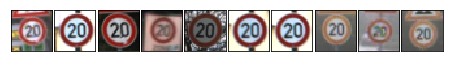

----------------------------------------------------------------------------

Class 1: Speed limit (30km/h)                                1980 samples


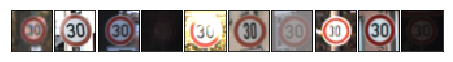

----------------------------------------------------------------------------

Class 2: Speed limit (50km/h)                                2010 samples


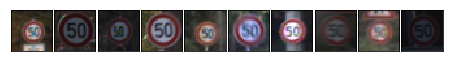

----------------------------------------------------------------------------

Class 3: Speed limit (60km/h)                                1260 samples


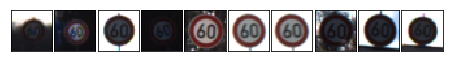

----------------------------------------------------------------------------

Class 4: Speed limit (70km/h)                                1770 samples


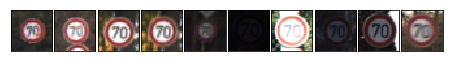

----------------------------------------------------------------------------

Class 5: Speed limit (80km/h)                                1650 samples


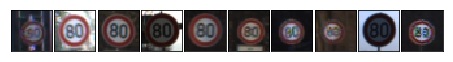

----------------------------------------------------------------------------

Class 6: End of speed limit (80km/h)                         360 samples


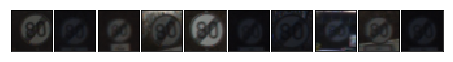

----------------------------------------------------------------------------

Class 7: Speed limit (100km/h)                               1290 samples


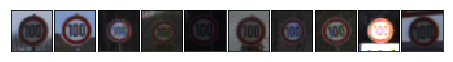

----------------------------------------------------------------------------

Class 8: Speed limit (120km/h)                               1260 samples


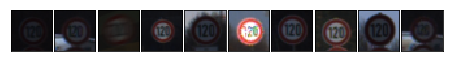

----------------------------------------------------------------------------

Class 9: No passing                                          1320 samples


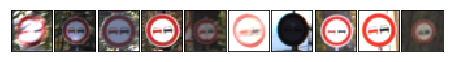

----------------------------------------------------------------------------

Class 10: No passing for vehicles over 3.5 metric tons        1800 samples


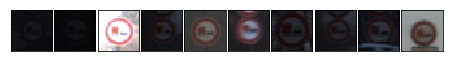

----------------------------------------------------------------------------

Class 11: Right-of-way at the next intersection               1170 samples


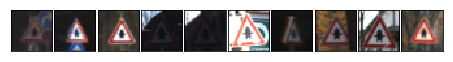

----------------------------------------------------------------------------

Class 12: Priority road                                       1890 samples


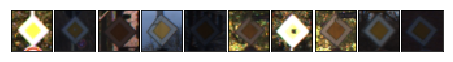

----------------------------------------------------------------------------

Class 13: Yield                                               1920 samples


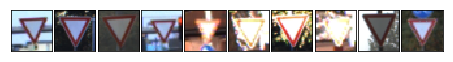

----------------------------------------------------------------------------

Class 14: Stop                                                690 samples


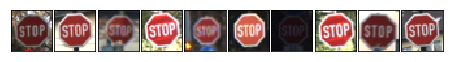

----------------------------------------------------------------------------

Class 15: No vehicles                                         540 samples


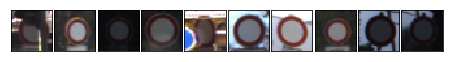

----------------------------------------------------------------------------

Class 16: Vehicles over 3.5 metric tons prohibited            360 samples


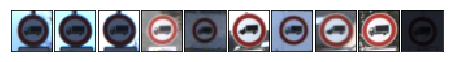

----------------------------------------------------------------------------

Class 17: No entry                                            990 samples


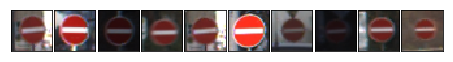

----------------------------------------------------------------------------

Class 18: General caution                                     1080 samples


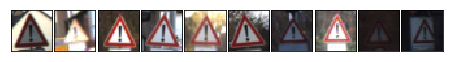

----------------------------------------------------------------------------

Class 19: Dangerous curve to the left                         180 samples


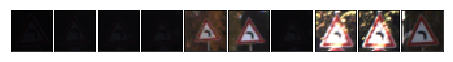

----------------------------------------------------------------------------

Class 20: Dangerous curve to the right                        300 samples


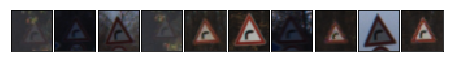

----------------------------------------------------------------------------

Class 21: Double curve                                        270 samples


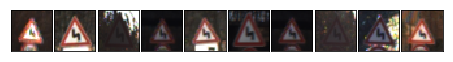

----------------------------------------------------------------------------

Class 22: Bumpy road                                          330 samples


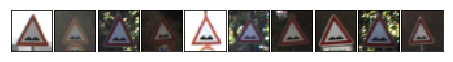

----------------------------------------------------------------------------

Class 23: Slippery road                                       450 samples


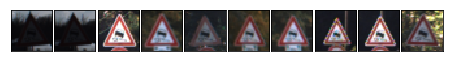

----------------------------------------------------------------------------

Class 24: Road narrows on the right                           240 samples


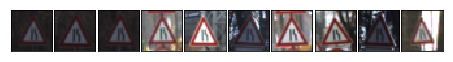

----------------------------------------------------------------------------

Class 25: Road work                                           1350 samples


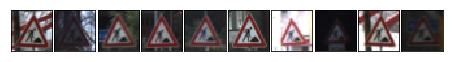

----------------------------------------------------------------------------

Class 26: Traffic signals                                     540 samples


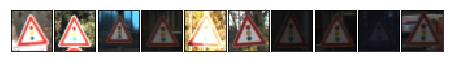

----------------------------------------------------------------------------

Class 27: Pedestrians                                         210 samples


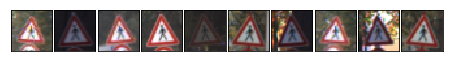

----------------------------------------------------------------------------

Class 28: Children crossing                                   480 samples


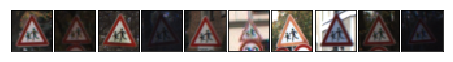

----------------------------------------------------------------------------

Class 29: Bicycles crossing                                   240 samples


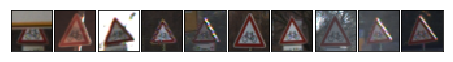

----------------------------------------------------------------------------

Class 30: Beware of ice/snow                                  390 samples


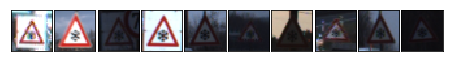

----------------------------------------------------------------------------

Class 31: Wild animals crossing                               690 samples


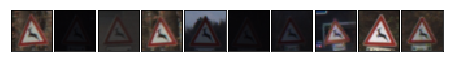

----------------------------------------------------------------------------

Class 32: End of all speed and passing limits                 210 samples


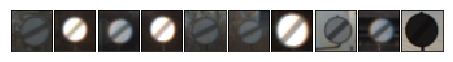

----------------------------------------------------------------------------

Class 33: Turn right ahead                                    599 samples


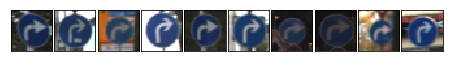

----------------------------------------------------------------------------

Class 34: Turn left ahead                                     360 samples


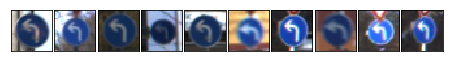

----------------------------------------------------------------------------

Class 35: Ahead only                                          1080 samples


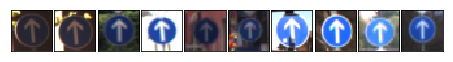

----------------------------------------------------------------------------

Class 36: Go straight or right                                330 samples


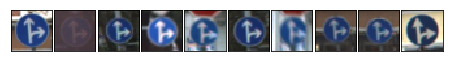

----------------------------------------------------------------------------

Class 37: Go straight or left                                 180 samples


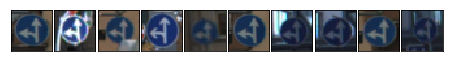

----------------------------------------------------------------------------

Class 38: Keep right                                          1860 samples


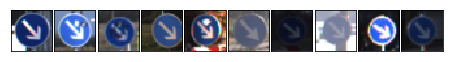

----------------------------------------------------------------------------

Class 39: Keep left                                           270 samples


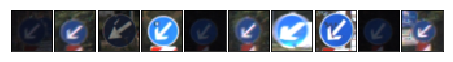

----------------------------------------------------------------------------

Class 40: Roundabout mandatory                                300 samples


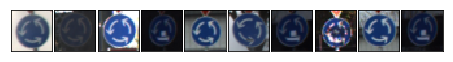

----------------------------------------------------------------------------

Class 41: End of no passing                                   210 samples


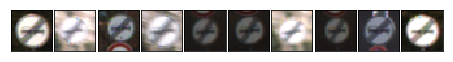

----------------------------------------------------------------------------

Class 42: End of no passing by vehicles over 3.5 metric tons  210 samples


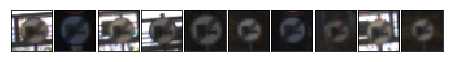

----------------------------------------------------------------------------



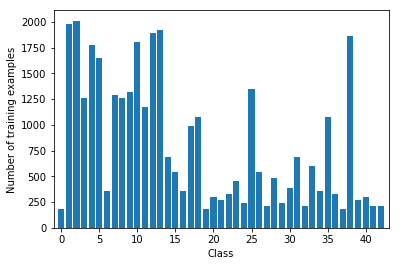

In [12]:
# Visualizations will be shown in the notebook.
%matplotlib inline

sign_classes, class_indices, class_counts = \
    np.unique(y_train, return_index = True, return_counts = True)

col_width = max(len(name) for name in signnames)

def visualize_dataset():
    for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
        print("Class %i: %-*s  %s samples" % (c, col_width, signnames[c], str(c_count)))
        fig = pyplot.figure(figsize=(6, 1))
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
        random_indices = random.sample(range(c_index, c_index + c_count), 10)
        for i in range(10):
            axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
            axis.imshow(X_train[random_indices[i]])
        pyplot.show()
        print("----------------------------------------------------------------------------\n")

# visualize_dataset()

pyplot.bar(np.arange(43), class_counts, align='center')
pyplot.xlabel('Class')
pyplot.ylabel('Number of training examples')
pyplot.xlim([-1, 43])
pyplot.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Finished preprocessing training data.
Processed training data shape = (34799, 32, 32, 1)
Preprocessing validation data...
Finished validation testing data.
Processed validation data shape = (4410, 32, 32, 1)
Preprocessing testing data...
Finished preprocessing testing data.
Processed testing data shape = (12630, 32, 32, 1)
All data preprocessing complete.
Generating new data.
Additional data generated. Any classes lacking data now have 809 pictures.
The updated number of training examples = 46714
Generating new data.
Additional data generated. Any classes lacking data now have 102 pictures.
The updated number of validation examples = 5682


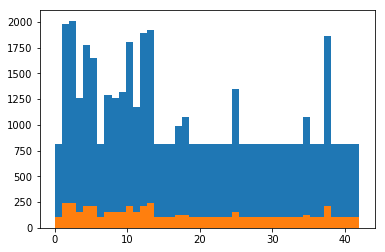

In [13]:
# Grayscales an image
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# Normalizes the data between 0.1 and 0.9 instead of 0 to 255
def normalize(data):
    return (data / 255.).astype(np.float32)
#     return data / 255 * 0.8 + 0.1

# Iterates through grayscale for each image in the data
def preprocess(data):
    gray_images = []
    for image in data:
        gray = grayscale(image)
        gray_images.append(gray)

    return np.array(gray_images)

# Iterate through grayscale
X_train = preprocess(X_train)
X_train = X_train[..., newaxis]

# Normalize
X_train = normalize(X_train)

print('Finished preprocessing training data.')

# Double-check that the image is changed to depth of 1
image_shape2 = X_train.shape
print("Processed training data shape =", image_shape2)

print('Preprocessing validation data...')

# Iterate through grayscale
X_valid = preprocess(X_valid)
X_valid = X_valid[..., newaxis]

# Normalize
X_valid = normalize(X_valid)

print('Finished validation testing data.')

# Double-check that the image is changed to depth of 1
image_shape4 = X_valid.shape
print("Processed validation data shape =", image_shape4)

print('Preprocessing testing data...')

# Iterate through grayscale
X_test = preprocess(X_test)
X_test = X_test[..., newaxis]

# Normalize
X_test = normalize(X_test)

print('Finished preprocessing testing data.')

# Double-check that the image is changed to depth of 1
image_shape3 = X_test.shape
print("Processed testing data shape =", image_shape3)

print('All data preprocessing complete.')

########################################################################################################################

# Generate additional data
def generate_new_data(x_set, y_set):
    # min_desired below is just mean_pics but wanted to make the code below easier to distinguish
    pics_in_class = np.bincount(y_set)
    mean_pics = int(np.mean(pics_in_class))
    min_desired = int(mean_pics)

    print('Generating new data.')

    # Angles to be used to rotate images in additional data made
    angles = [-5, 5, -10, 10, -15, 15, -20, 20, -25, 25]

    # Iterate through each class
    for i in range(len(pics_in_class)):

        # Check if less data than the mean
        if pics_in_class[i] < min_desired:

            # Count how many additional pictures we want
            new_wanted = min_desired - pics_in_class[i]
            picture = np.where(y_set == i)
            more_X = []
            more_y = []

            # Make the number of additional pictures needed to arrive at the mean
            for num in range(new_wanted):
                # Rotate images and append new ones to more_X, append the class to more_y
                more_X.append(
                    ndimage.rotate(x_set[picture][random.randint(0, pics_in_class[i] - 1)], random.choice(angles),
                                   reshape=False))
                more_y.append(i)

            # Append the pictures generated for each class back to the original data
            x_set = np.append(x_set, np.array(more_X), axis=0)
            y_set = np.append(y_set, np.array(more_y), axis=0)

    return x_set, y_set, min_desired

X_train, y_train, min_train_desired = generate_new_data(X_train, y_train)
print('Additional data generated. Any classes lacking data now have', min_train_desired, 'pictures.')
pyplot.hist(y_train, bins = n_classes)
updated_n_train = len(X_train)
print("The updated number of training examples =", updated_n_train)

X_valid, y_valid, min_valid_desired = generate_new_data(X_valid, y_valid)
print('Additional data generated. Any classes lacking data now have', min_valid_desired, 'pictures.')
pyplot.hist(y_valid, bins = n_classes)
updated_n_valid = len(X_valid)
print("The updated number of validation examples =", updated_n_valid)

### Model Architecture

In [14]:
def flip_extend(X, y):
    # Classes of signs that, when flipped horizontally, should still be classified as the same class
    self_flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
    # Classes of signs that, when flipped vertically, should still be classified as the same class
    self_flippable_vertically = np.array([1, 5, 12, 15, 17])
    # Classes of signs that, when flipped horizontally and then vertically, should still be classified as the same class
    self_flippable_both = np.array([32, 40])
    # Classes of signs that, when flipped horizontally, would still be meaningful, but should be classified as some other class
    cross_flippable = np.array([
        [19, 20],
        [33, 34],
        [36, 37],
        [38, 39],
        [20, 19],
        [34, 33],
        [37, 36],
        [39, 38],
    ])
    num_classes = 43

    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype=X.dtype)
    y_extended = np.empty([0], dtype=y.dtype)

    for c in range(num_classes):
        # First copy existing data for this class
        X_extended = np.append(X_extended, X[y == c], axis=0)
        # If we can flip images of this class horizontally and they would still belong to said class...
        if c in self_flippable_horizontally:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X[y == c][:, :, ::-1, :], axis=0)
        # If we can flip images of this class horizontally and they would belong to other class...
        if c in cross_flippable[:, 0]:
            # ...Copy flipped images of that other class to the extended array.
            flip_class = cross_flippable[cross_flippable[:, 0] == c][0][1]
            X_extended = np.append(X_extended, X[y == flip_class][:, :, ::-1, :], axis=0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype=int))

        # If we can flip images of this class vertically and they would still belong to said class...
        if c in self_flippable_vertically:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, :, :], axis=0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype=int))

        # If we can flip images of this class horizontally AND vertically and they would still belong to said class...
        if c in self_flippable_both:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, ::-1, :], axis=0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype=int))

    return (X_extended, y_extended)

X_train, y_train = flip_extend(X_train, y_train)
X_valid, y_valid = flip_extend(X_valid, y_valid)

print("Number of training examples after horizontal flipping =", X_train.shape[0])
print("Number of validation examples after horizontal flipping =", X_valid.shape[0])

Number of training examples after horizontal flipping = 78229
Number of validation examples after horizontal flipping = 9492


In [15]:
### Define your architecture here.
# Set placeholder variables for x, y, and the keep_prob for dropout
# Also, one-hot encode y
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

# The below is only necessary to reset if the notebook has not been shutdown
# tf.reset_default_graph()

EPOCHS = 10
BATCH_SIZE = 150

def neural_network(x):
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Weight and bias
    # If not using grayscale, the third number in shape would be 3
    c1_weight = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma))
    c1_bias = tf.Variable(tf.zeros(6))
    # Apply convolution
    conv_layer1 = tf.nn.conv2d(x, c1_weight, strides=[1, 1, 1, 1], padding='VALID') + c1_bias

    # Activation for layer 1
    conv_layer1 = tf.nn.relu(conv_layer1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_layer1 = tf.nn.avg_pool(conv_layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    # Note: The second layer is implemented the exact same as layer one, with layer 1 as input instead of x
    # And then of course changing the numbers to fit the desired ouput of 10x10x16
    # Weight and bias
    c2_weight = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    c2_bias = tf.Variable(tf.zeros(16))
    # Apply convolution for layer 2
    conv_layer2 = tf.nn.conv2d(conv_layer1, c2_weight, strides=[1, 1, 1, 1], padding='VALID') + c2_bias

    # Activation for layer 2
    conv_layer2 = tf.nn.relu(conv_layer2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer2 = tf.nn.avg_pool(conv_layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten to get to fully connected layers. Input = 5x5x16. Output = 400.
    flat = tf.contrib.layers.flatten(conv_layer2)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    # Although this is fully connected, the weights and biases still are implemented similarly
    # There is no filter this time, so shape only takes input and output
    # Weight and bias
    fc1_weight = tf.Variable(tf.truncated_normal(shape=(400, 200), mean=mu, stddev=sigma))
    fc1_bias = tf.Variable(tf.zeros(200))
    # Here is the main change versus a convolutional layer - matrix multiplication instead of 2D convolution
    fc1 = tf.matmul(flat, fc1_weight) + fc1_bias

    # Activation for the first fully connected layer.
    # Same thing as before
    fc1 = tf.nn.relu(fc1)

    # Dropout, to prevent overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    # Same as the fc1 layer, just with updated output numbers
    fc2_weight = tf.Variable(tf.truncated_normal(shape=(200, 100), mean=mu, stddev=sigma))
    fc2_bias = tf.Variable(tf.zeros(100))
    # Again, matrix multiplication
    fc2 = tf.matmul(fc1, fc2_weight) + fc2_bias

    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5 Fully Connected. Input = 84. Output = 43.
    # Since this is the final layer, output needs to match up with the number of classes
    fc3_weight = tf.Variable(tf.truncated_normal(shape=(100, 43), mean=mu, stddev=sigma))
    fc3_bias = tf.Variable(tf.zeros(43))
    # Again, matrix multiplication
    logits = tf.matmul(fc2, fc3_weight) + fc3_bias

    return logits, conv_layer1, conv_layer2, fc1, fc2

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
# Setting learning rate, loss functions, and optimizer
rate = 0.001

logits, conv_layer1, conv_layer2, fc1, fc2 = neural_network(x)
# logits, conv1, conv2, conv3, fc1 = neural_network(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# The below is used in the validation part of the neural network
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy =  sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


### Train your model here.
### Feel free to use as many code cells as needed.
save_file = 'train_model'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.7})

        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    # Save the model
    saver.save(sess, './' + save_file)
    print('Trained Model Saved.')

Training...

EPOCH 1 ...
Validation Accuracy = 0.721

EPOCH 2 ...
Validation Accuracy = 0.797

EPOCH 3 ...
Validation Accuracy = 0.845

EPOCH 4 ...
Validation Accuracy = 0.869

EPOCH 5 ...
Validation Accuracy = 0.896

EPOCH 6 ...
Validation Accuracy = 0.909

EPOCH 7 ...
Validation Accuracy = 0.908

EPOCH 8 ...
Validation Accuracy = 0.923

EPOCH 9 ...
Validation Accuracy = 0.929

EPOCH 10 ...
Validation Accuracy = 0.933

Trained Model Saved.


In [17]:
# Launch the model on the test data
with tf.Session() as sess:
    saver.restore(sess, './' + save_file)
    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, keep_prob : 1.0})

print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.9139355421066284


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

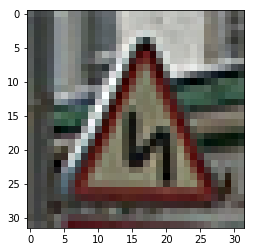

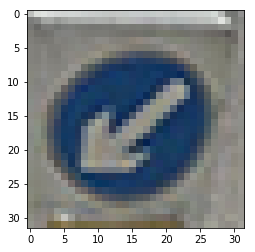

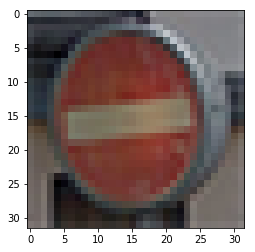

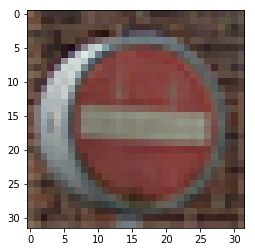

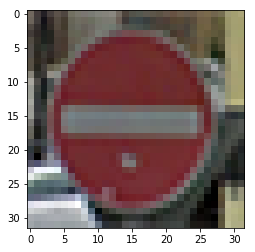

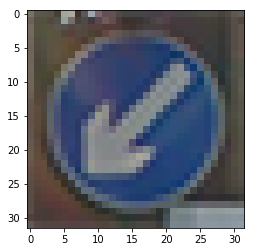

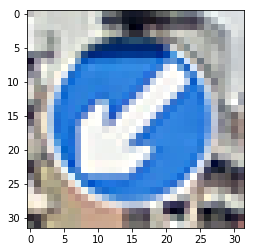

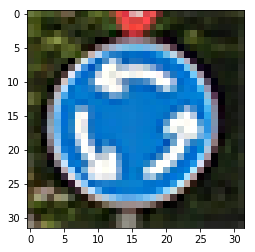

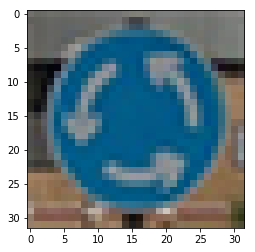

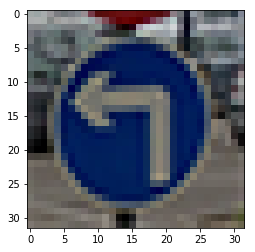

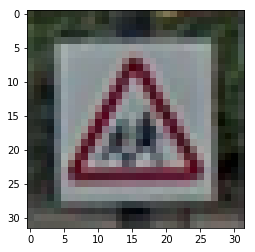

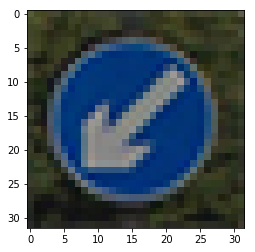

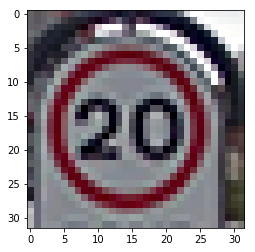

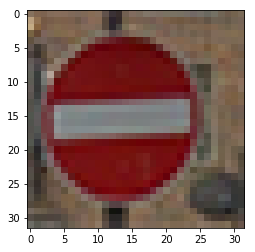

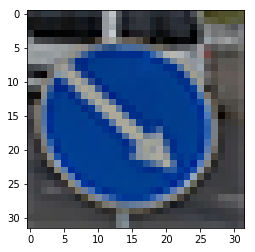

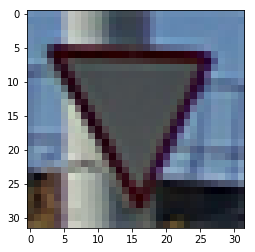

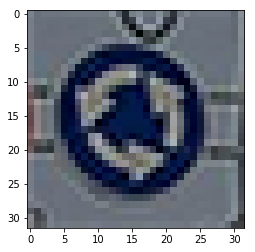

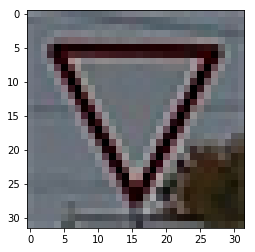

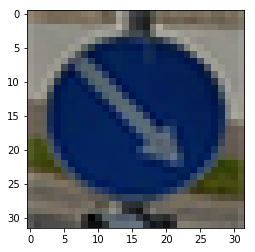

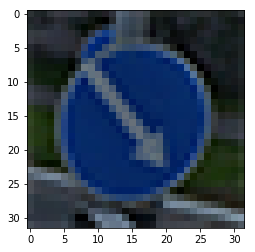

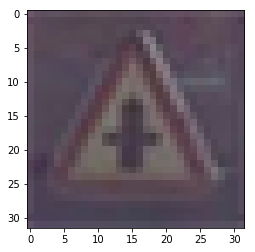

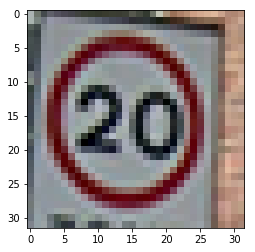

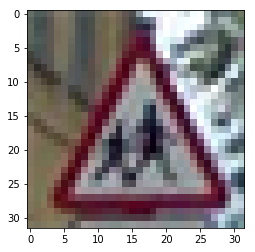

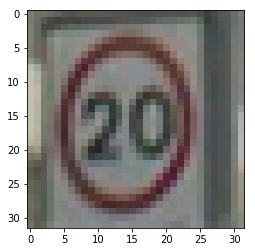

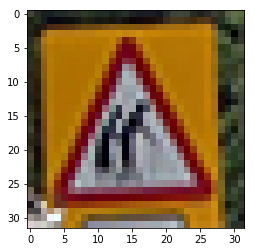

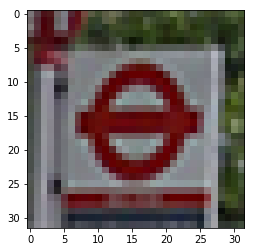

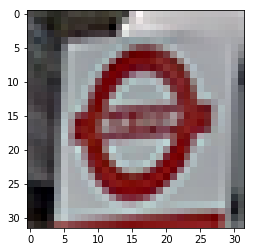

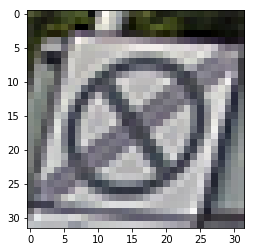

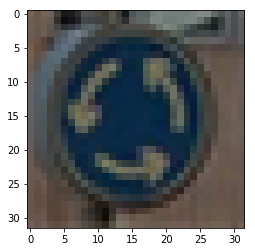

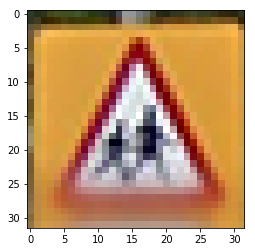

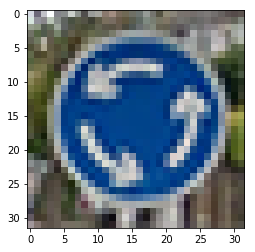

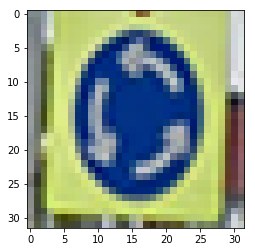

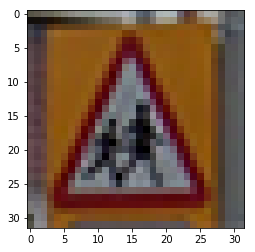

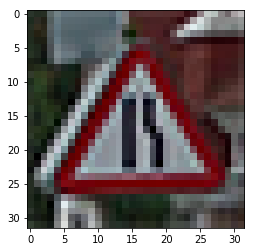

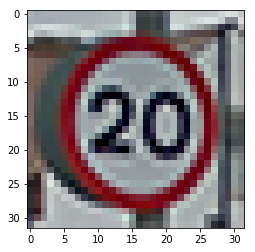

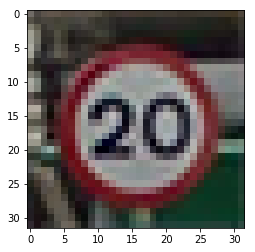

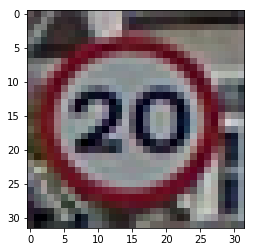

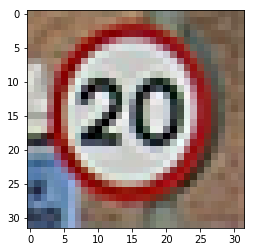

In [102]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Importing the images, and let's take a look at what we have!

# Load images from .png files to `X_custom` NumPy array
X_custom = np.empty([0, 32, 32, 3], dtype = np.int32)
for i in range(38):
    image = io.imread(os.getcwd() + '/additional_images/' + "example_{0:0>5}".format(i + 1) + '.png')
    X_custom = np.append(X_custom, [image[:, :, :3]], axis = 0)
    pyplot.imshow(image)
    pyplot.show()

# Provide labels of the captured images:
y_custom = np.array([
    21, # "example_00001"
    39, # "example_00002"
    17, # "example_00003"
    17, # "example_00004"
    17, # "example_00005"
    39, # "example_00006"
    39, # "example_00007"
    40, # "example_00008"
    40, # "example_00009"
    34, # "example_00010"
    28, # "example_00011"
    39, # "example_00012"
    0, # "example_00013"
    17, # "example_00014"
    38, # "example_00015"
    13, # "example_00016"
    40, # "example_00017"
    13, # "example_00018"
    38, # "example_00019"
    38, # "example_00020"
    11, # "example_00021"
    0, # "example_00022"
    28, # "example_00023"
    0, # "example_00024"
    99, # "example_00025"
    99, # "example_00026"
    99, # "example_00027"
    32, # "example_00028"
    40, # "example_00029"
    28, # "example_00030"
    40, # "example_00031"
    40, # "example_00032"
    28, # "example_00033"
    24, # "example_00034"
    0, # "example_00035"
    0, # "example_00036"
    0, # "example_00037"
    0 # "example_00038"
])

In [103]:
# First, double-check the image shape to make sure it matches the original data's 32x32x3 size
print(X_custom.shape)

(38, 32, 32, 3)


In [104]:
def preprocess_dataset(X):
    #Convert to grayscale, e.g. single channel Y
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)
        
    for i in range(X.shape[0]):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            X[i] = exposure.equalize_adapthist(X[i])

    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,)) 
    return X

# Iterate through grayscale
X_custom = preprocess_dataset(X_custom)

print('Finished preprocessing additional pictures.')

# Double-check that the image is changed to depth of 1
new_image_shape = X_custom.shape
print("Processed additional pictures shape =", new_image_shape)

Finished preprocessing additional pictures.
Processed additional pictures shape = (38, 32, 32, 1)


### Predict the Sign Type for Each Image

In [105]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
### Run the predictions here.
### Feel free to use as many code cells as needed.
# Launch the model on the new pictures
with tf.Session() as sess:
    saver.restore(sess, './' + save_file)
    new_pics_classes = sess.run(logits, feed_dict={x: X_custom, keep_prob : 1.0})

### Analyze Performance

Actual class:  Double curve


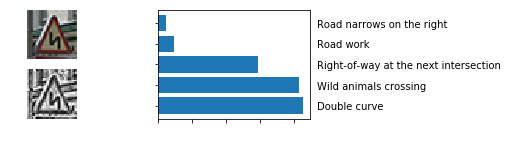

---------------------------------------------------------------------------------------------------

Actual class:  Keep left


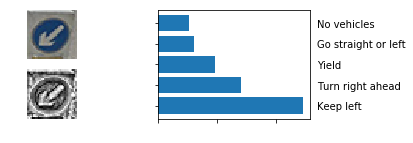

---------------------------------------------------------------------------------------------------

Actual class:  No entry


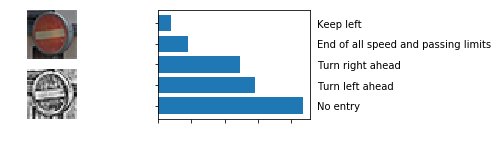

---------------------------------------------------------------------------------------------------

Actual class:  No entry


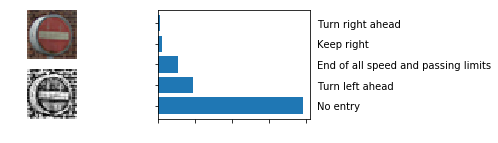

---------------------------------------------------------------------------------------------------

Actual class:  No entry


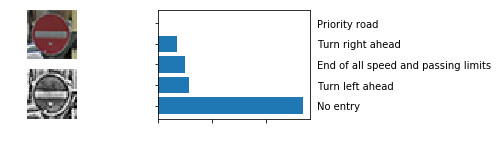

---------------------------------------------------------------------------------------------------

Actual class:  Keep left


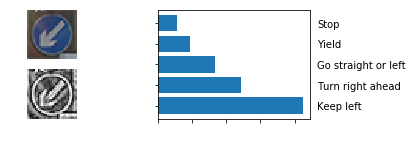

---------------------------------------------------------------------------------------------------

Actual class:  Keep left


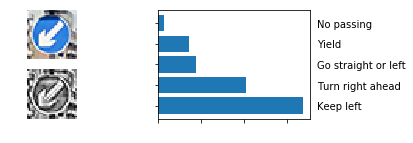

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


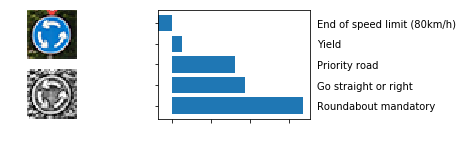

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


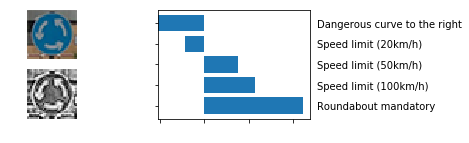

---------------------------------------------------------------------------------------------------

Actual class:  Turn left ahead


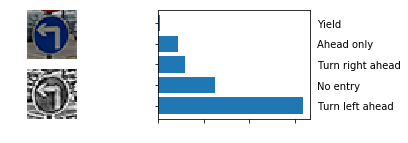

---------------------------------------------------------------------------------------------------

Actual class:  Children crossing


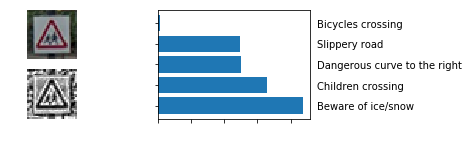

---------------------------------------------------------------------------------------------------

Actual class:  Keep left


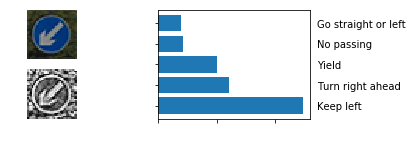

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


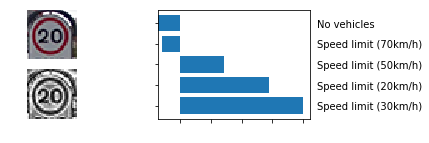

---------------------------------------------------------------------------------------------------

Actual class:  No entry


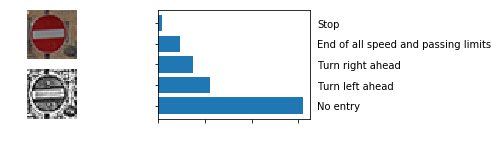

---------------------------------------------------------------------------------------------------

Actual class:  Keep right


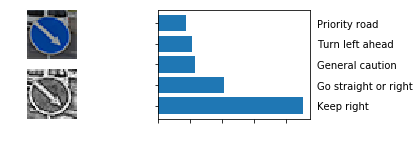

---------------------------------------------------------------------------------------------------

Actual class:  Yield


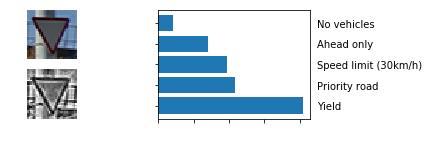

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


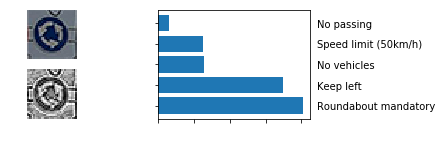

---------------------------------------------------------------------------------------------------

Actual class:  Yield


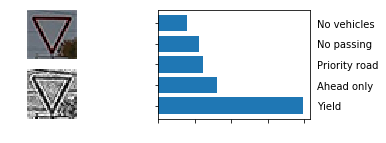

---------------------------------------------------------------------------------------------------

Actual class:  Keep right


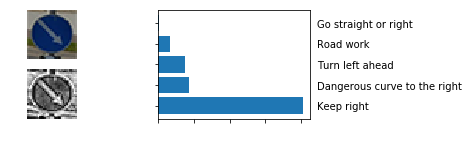

---------------------------------------------------------------------------------------------------

Actual class:  Keep right


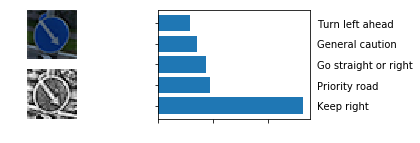

---------------------------------------------------------------------------------------------------

Actual class:  Right-of-way at the next intersection


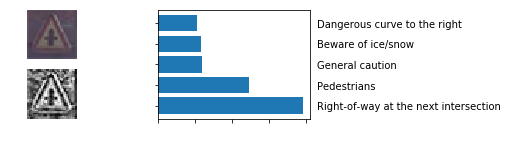

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


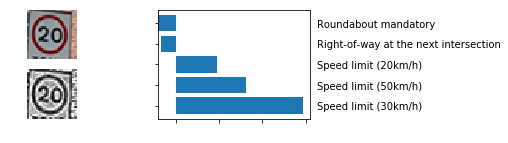

---------------------------------------------------------------------------------------------------

Actual class:  Children crossing


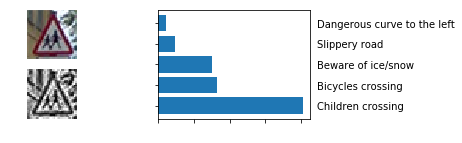

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


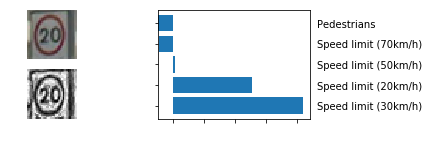

---------------------------------------------------------------------------------------------------

Actual class:  None


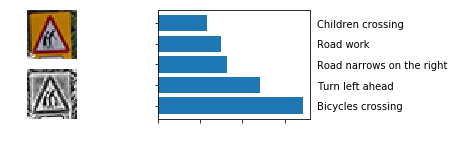

---------------------------------------------------------------------------------------------------

Actual class:  None


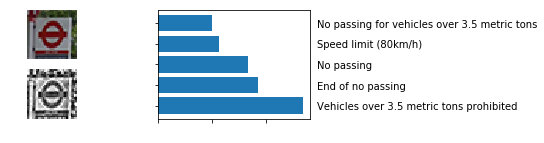

---------------------------------------------------------------------------------------------------

Actual class:  None


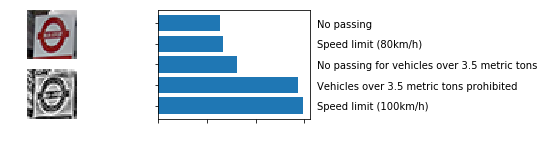

---------------------------------------------------------------------------------------------------

Actual class:  End of all speed and passing limits


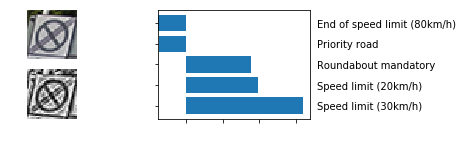

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


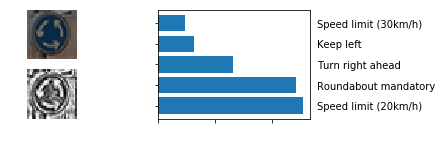

---------------------------------------------------------------------------------------------------

Actual class:  Children crossing


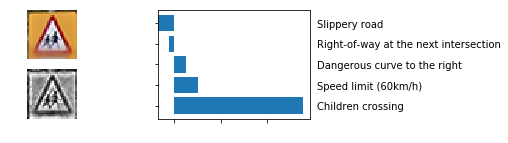

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


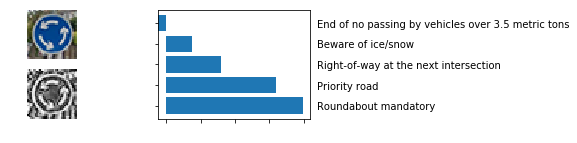

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


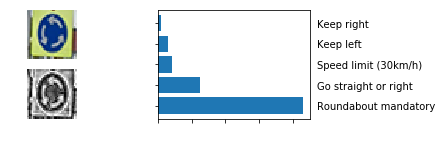

---------------------------------------------------------------------------------------------------

Actual class:  Children crossing


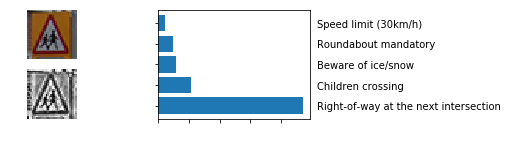

---------------------------------------------------------------------------------------------------

Actual class:  Road narrows on the right


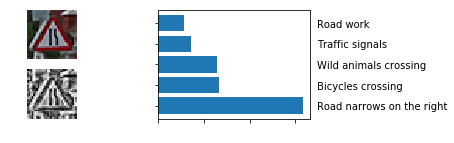

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


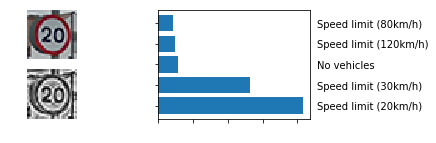

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


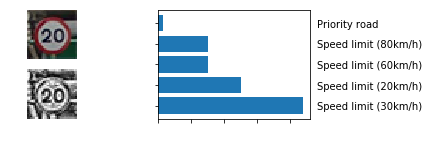

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


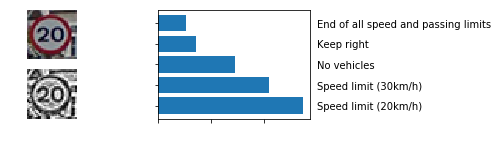

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


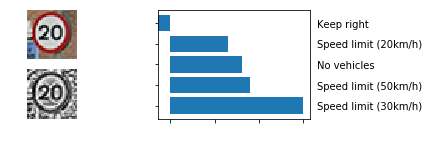

---------------------------------------------------------------------------------------------------



In [106]:
### Calculate the accuracy for these 38 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
# print(new_pics_classes)
import matplotlib.gridspec as gridspec

def plot_image_statistics(predictions, index):
    # Prepare original and preprocessed images
    original = io.imread(os.getcwd() + '/additional_images/' + "example_{0:0>5}".format(index + 1) + '.png')
    preprocessed = X_custom[index].reshape(32, 32)
        
    # Prepare the grid
    pyplot.figure(figsize = (6, 2))
    gridspec.GridSpec(2, 2)
    
    # Plot original image
    pyplot.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
    pyplot.imshow(original)
    pyplot.axis('off')

    # Plot preprocessed image
    pyplot.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
    pyplot.imshow(preprocessed, cmap='gray')
    pyplot.axis('off')

    # Plot predictions
    pyplot.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=2)
    pyplot.barh(np.arange(5)+.5, predictions[0][index], align='center')
    pyplot.yticks(np.arange(5)+.5, signnames[predictions[1][index].astype(int)])
    pyplot.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')
    
    pyplot.show()

with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(new_pics_classes, k=5, sorted=True))
    
# For every example plot original image, preprocessed image, and model predictions.
for i in range(38):
    print("Actual class: ", signnames[y_custom[i]] if y_custom[i] != 99 else "None")
    plot_image_statistics(predicts, i)
y_custom = y_custom[y_custom < 99]    print("---------------------------------------------------------------------------------------------------\n")

In [140]:
num_of_images = 0
correct = 0
for i in range(38):
    index = np.argmax(predicts[0][i])
    output = y_custom[i]
    prediction = predicts[1][i][index]
#     print(y_custom[i], prediction)
    if output == 99:
        continue
    
    if prediction == output:
        correct += 1
        
    num_of_images += 1
  
print(num_of_images)
print(correct)
accuracy = 100.0 * correct / num_of_images
print("Accuracy on captured images: %.2f%%" % (accuracy))

35
26
Accuracy on captured images: 74.29%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [30]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
for i in range(len(predicts[0])):
    print('Image', i, 'probabilities:', predicts[0][i], '\n and predicted classes:', predicts[1][i])

Image 0 probabilities: [ 8.55161953  8.28997421  5.90130997  0.90974021  0.43810457] 
 and predicted classes: [21 31 11 25 24]
Image 1 probabilities: [ 24.55037689  14.03134727   9.67665291   6.06848145   5.22753525] 
 and predicted classes: [39 33 13 37 15]
Image 2 probabilities: [ 10.88169956   7.29783583   6.14442873   2.25313139   0.95487875] 
 and predicted classes: [17 34 33 32 39]
Image 3 probabilities: [ 19.62603188   4.73508072   2.73274159   0.54241306   0.27299786] 
 and predicted classes: [17 34 32 38 33]
Image 4 probabilities: [  2.67962627e+01   5.72259617e+00   4.96715736e+00   3.56576180e+00
   5.67972660e-03] 
 and predicted classes: [17 34 32 33 12]
Image 5 probabilities: [ 21.25421524  12.18148327   8.29926682   4.65128899   2.74042988] 
 and predicted classes: [39 33 37 13 14]
Image 6 probabilities: [ 16.83531952  10.14385796   4.41833305   3.5876193    0.64981204] 
 and predicted classes: [39 33 37 13  9]
Image 7 probabilities: [ 6.72957611  3.75659513  3.23865724 

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [74]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    pyplot.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        pyplot.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        pyplot.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            pyplot.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            pyplot.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            pyplot.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            pyplot.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

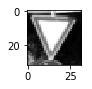

In [92]:
image = X_train[21].squeeze()
pyplot.figure(figsize=(1,1))
pyplot.imshow(image, cmap="gray")

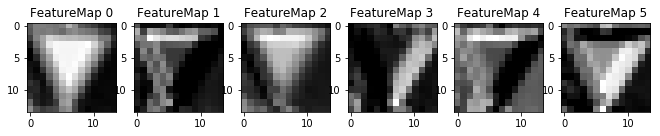

In [81]:
with tf.Session() as sess:
    saver.restore(sess, './' + save_file)
    outputFeatureMap([X_train[21]], conv_layer1)

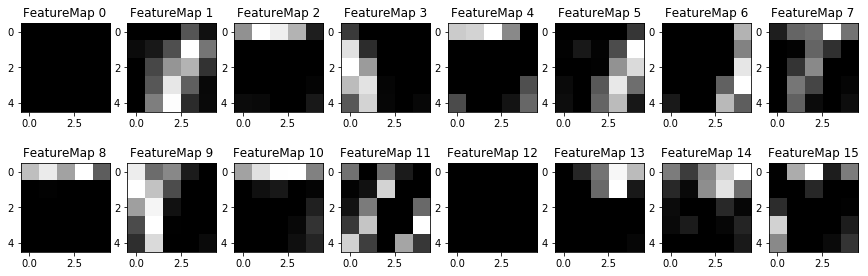

In [82]:
with tf.Session() as sess:
    saver.restore(sess, './' + save_file)
    outputFeatureMap([X_train[21]], conv_layer2)    

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 